# Dealing with data


## 1. The command line (Optional*)

PLEASE NOTE: TO RUN UNIX COMMANDS YOU SHOULD SELECT CORRECT OPTIONS WHEN INSTALLING GIT.

The command line is a text oriented way to perform operations with your operating system (looking at files, copying or creating folders, starting programs, etc). 

It can give you more control and provide a way to "look under the hood". In many cases, such as dealing with raw data files, the command line is faster. 

You should be familiar with the terminal or command line as well as some basic unix ("Bash") commands.

![Terminal](images/terminal.png)

Note: MS Windows provides a different set of command line commands from Unix. Apple computers include the full set of Unix commands as the operating system is more closely based on Unix. Linux is an implementation of Unix. When you installed the Anaconda distribution you had the option to install the Unix commands onto your system as well. 

### 1.1. File system 
To navigate the folder structure of the machine you are on you will typically use commands such as `ls` (list) and `cd` (change directory). You can make a directory with `mkdir` or move (`mv`) and copy (`cp`) files. To delete a file you can `rm` (remove) it. To print the contents of a file you can `cat` (concatenate) it to the screen.

Many commands have options you can set when running them. For example to get a listing of files as a vertical list you can pass the `-l` (list) flag, e.g. '`ls -l`'. During the normal course of using the command line, you will learn the most useful flags. The `-r` option is for recursive version of commands so that you can for example delete subfolders when you delete a directory with `rm -r` (be very careful with this command!).

If you want to see all possible options you can always read the `man` (manual) page for a command, e.g. '`man ls`'. When you are done reading the `man` page, you can exit by hitting `q` to quit.

You can use shell commands in IPython notebooks by prefixing the line with an exclamation point!

In [6]:
!ls

Dealing with data solutions.ipynb
Dealing with data.ipynb
data
images


In [7]:
!mkdir test

In [8]:
!ls -l

total 56
-rw-r--r-- 1 adamg 197609 26611 Mar 20 15:03 Dealing with data solutions.ipynb
-rw-r--r-- 1 adamg 197609 26611 Mar 12 11:17 Dealing with data.ipynb
drwxr-xr-x 1 adamg 197609     0 Mar  9 11:43 data
drwxr-xr-x 1 adamg 197609     0 Mar  9 17:10 images
drwxr-xr-x 1 adamg 197609     0 Mar 20 15:03 test


In [9]:
!ls -l images/

total 60
-rw-r--r-- 1 adamg 197609 26799 Mar  9 17:10 iris.png
-rw-r--r-- 1 adamg 197609 28925 Mar  9 11:43 terminal.png


In [ ]:
!cp images/terminal.png test/some_picture.png

In [ ]:
!ls test/

In [ ]:
!rm test/ # you can't delete a folder using `rm`!

In [5]:
# WARNING THIS WILL NOT CONFIRM!
!rm -rf test/

In [ ]:
!ls -l

### 1.2. Data manipulation and exploration
Virtually anything you want to do with a data file can be done at the command line. There are dozens of commands that can be used together to almost anything you would think of! 

Lets take a look at the the file `data/users.csv`.

Before we do anything, lets take a look at the first few lines of the file to get an idea of what's in it.

In [1]:
!head data/users.csv

user,variable1,variable2
parallelconcerned,145.391881,-6.081689
driftmvc,145.7887,-5.207083
snowdonevasive,144.295861,-5.826789
cobolglaucous,146.726242,-6.569828
stylishmugs,147.22005,-9.443383
hypergalaxyfibula,143.669186,-3.583828
pipetsrockers,-45.425978,61.160517
bracesworkable,-51.678064,64.190922
spiritedjump,-50.689325,67.016969


Maybe we want to see a few more lines of the file,

In [ ]:
!head -15 data/users.csv

How about the last few lines of the file?

In [ ]:
!tail data/users.csv

We can count how many lines are in the file by using `wc` (a word counting tool) with the `-l` flag to count lines,

In [ ]:
!wc -l data/users.csv

It looks like there are three columns in this file, lets take a look at the first one alone. Here, we can `cut` the field (`-f`) we want as long as we give the proper delimeter (`-d` defaults to tab).

In [ ]:
!cut -f1 -d',' data/users.csv

That's a lot of output. Let's combine the `cut` command with the `head` command by _piping_ the output of one command into another one,

In [ ]:
!cut -f1 -d',' data/users.csv | head

We can use pipes (`|`) to string together many commands to create very powerful one liners. For example, lets get the number of unique users in the first column. We will get all values from the first column, sort them, find all unique values, and then count the number of lines,

In [ ]:
!cut -f1 -d',' data/users.csv | sort | uniq | wc -l

Or, we can get a list of the top-10 most frequently occuring users. If we give `uniq` the `-c` flag, it will return the number of times each value occurs. Since these counts are the first entry in each new line, we can tell `sort` to expect numbers (`-n`) and to give us the results in reverse (`-r`) order. Note, that when you want to use two or more single letter flags, you can just place them one after another.

In [ ]:
!cut -f1 -d',' data/users.csv | sort | uniq -c | sort -nr | head

After some exploration we decide we want to keep only part of our data and bring it into a new file. Let's find all the records that have a negative value in the second and third columns and put these results in a file called `data/negative_users.csv`. Searching through files can be done using _[regular expressions](http://www.robelle.com/smugbook/regexpr.html#expression)_ with a tool called `grep` (Global Regular Expression Printer). You can direct output into a file using a `>`.

In [ ]:
!grep '.*,-.*,-.*' data/users.csv > data/negative_users.csv

We can check the data folder to see if our new file is in there,

In [ ]:
!ls -l data

## 2. Using Python, IPython, and Pandas
The command line is great for a first step in data exploration. However, to do some more in depth operations you will generally want to move to a language and environment better suited for involved data manipulation. Here, we will discuss the use of Python as a data crunching tool.
|
In this section we will only discuss the use of `pandas` to explore data with data frames. You can also explore data line by line by "streaming" it; but that is beyond this class. Streaming in data is very useful for highly unstructured data. If you are interested in this, feel free to ask about it on the class forums!

### 2.1. Example one: User exploration

For structured data like we have here, we will use `pandas`.

In [6]:
# Read in data/users.csv using Pandas
import pandas as pd
users = pd.read_csv("data/users.csv")

In [7]:
# Take a look at the Panda's DataFrame
users.head()

,user,variable1,variable2
0,parallelconcerned,145.391881,-6.081689
1,driftmvc,145.788700,-5.207083
2,snowdonevasive,144.295861,-5.826789
3,cobolglaucous,146.726242,-6.569828
4,stylishmugs,147.220050,-9.443383


In [8]:
# Add another column to this DataFrame
users['sum'] = users['variable1'] + users['variable2']
users.head()

,user,variable1,variable2,sum
0,parallelconcerned,145.391881,-6.081689,139.310192
1,driftmvc,145.788700,-5.207083,140.581617
2,snowdonevasive,144.295861,-5.826789,138.469072
3,cobolglaucous,146.726242,-6.569828,140.156414
4,stylishmugs,147.220050,-9.443383,137.776667


Python and Pandas allow us to do complex tasks very easily, such as plotting.

Let's visualize the relationship between variable1 vs. variable2 in these data with a scatterplot.

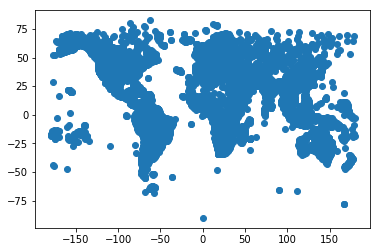

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(users['variable1'], users['variable2'])

We can update our DataFrame given the new information we discovered.

In [9]:
users.columns = ['user', 'feature1', 'feature2', 'sum']
users.head()

,user,feature1,feature2,sum
0,parallelconcerned,145.391881,-6.081689,139.310192
1,driftmvc,145.788700,-5.207083,140.581617
2,snowdonevasive,144.295861,-5.826789,138.469072
3,cobolglaucous,146.726242,-6.569828,140.156414
4,stylishmugs,147.220050,-9.443383,137.776667


### 2.2. Example 2: Survey responses
Let's read in an edited version of your survey responses. Since the data is very well structured (it's a nicely formatted .csv file) we will simply use `pandas`. This file is located in the `data/` folder.

In [10]:
survey = pd.read_csv('data/survey.csv')

Now that we have the data, let's take a look at what we have.

In [11]:
survey.head()

,timestamp,stern,regression,database,cloud,api,season,terminal,python,machinelearning,statistics,mathematics,datavisualization,business,communication,fruit
0,1,Finance,Yes,No,No,No,Summer,4,6,4,7,9,6,7,7,Apples
1,2,Finance,Yes,Yes,Yes,Yes,Fall,5,1,1,6,8,6,8,10,Oranges
2,3,Finance,Yes,No,No,No,Summer,1,5,1,5,8,1,6,8,Apples
3,4,Statistics,Yes,Yes,Yes,Yes,Summer,3,5,1,8,7,6,6,7,Apples
4,5,Information System,Yes,Yes,Yes,Yes,Fall,2,5,1,6,5,1,8,8,Oranges


We have a lot of data here. How can we start to make sense of it? Using the pandas `describe()` method, we can get a summary of the numeric features.

In [12]:
survey.describe()

,timestamp,terminal,python,machinelearning,statistics,mathematics,datavisualization,business,communication
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.00000,41.000000,41.000000,41.000000
mean,21.000000,2.341463,3.487805,1.439024,5.951220,6.97561,4.487805,7.170732,7.609756
std,11.979149,1.931447,2.460914,0.975930,1.642425,1.35070,2.550705,1.828967,1.497966
min,1.000000,1.000000,1.000000,1.000000,1.000000,3.00000,1.000000,1.000000,3.000000
25%,11.000000,1.000000,1.000000,1.000000,5.000000,6.00000,2.000000,7.000000,7.000000
50%,21.000000,1.000000,3.000000,1.000000,6.000000,7.00000,5.000000,8.000000,8.000000
75%,31.000000,3.000000,5.000000,1.000000,7.000000,8.00000,6.000000,8.000000,9.000000
max,41.000000,7.000000,8.000000,5.000000,8.000000,9.00000,9.000000,10.000000,10.000000


You might find it easier to flip the data frame,

In [13]:
survey.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
timestamp,41.0,21.000000,11.979149,1.0,11.0,21.0,31.0,41.0
terminal,41.0,2.341463,1.931447,1.0,1.0,1.0,3.0,7.0
python,41.0,3.487805,2.460914,1.0,1.0,3.0,5.0,8.0
machinelearning,41.0,1.439024,0.975930,1.0,1.0,1.0,1.0,5.0
statistics,41.0,5.951220,1.642425,1.0,5.0,6.0,7.0,8.0
mathematics,41.0,6.975610,1.350700,3.0,6.0,7.0,8.0,9.0
datavisualization,41.0,4.487805,2.550705,1.0,2.0,5.0,6.0,9.0
business,41.0,7.170732,1.828967,1.0,7.0,8.0,8.0,10.0
communication,41.0,7.609756,1.497966,3.0,7.0,8.0,9.0,10.0


Do we have other features that weren't listed here? Some that aren't numeric? Let's take a look.

In [14]:
survey.columns

Index(['timestamp', 'stern', 'regression', 'database', 'cloud', 'api',
       'season', 'terminal', 'python', 'machinelearning', 'statistics',
       'mathematics', 'datavisualization', 'business', 'communication',
       'fruit'],
      dtype='object')

There are more fields here than we saw in our description. If we go back and look at the head of the data, we will see a few fields are Yes/No. Let's turn these into 0's and 1's.

In [15]:
for field in ['regression', 'database', 'cloud', 'api']:
    survey[field] = (survey[field] == "Yes").astype('int')

In [16]:
survey.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
timestamp,41.0,21.000000,11.979149,1.0,11.0,21.0,31.0,41.0
regression,41.0,0.682927,0.471117,0.0,0.0,1.0,1.0,1.0
database,41.0,0.365854,0.487652,0.0,0.0,0.0,1.0,1.0
cloud,41.0,0.219512,0.419058,0.0,0.0,0.0,0.0,1.0
api,41.0,0.268293,0.448575,0.0,0.0,0.0,1.0,1.0
terminal,41.0,2.341463,1.931447,1.0,1.0,1.0,3.0,7.0
python,41.0,3.487805,2.460914,1.0,1.0,3.0,5.0,8.0
machinelearning,41.0,1.439024,0.975930,1.0,1.0,1.0,1.0,5.0
statistics,41.0,5.951220,1.642425,1.0,5.0,6.0,7.0,8.0
mathematics,41.0,6.975610,1.350700,3.0,6.0,7.0,8.0,9.0


We have already seen how to get scatter plots in the previous example. Let's look at a histogram here.

Text(0.5,0,'Rank')

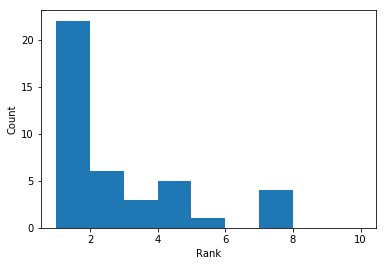

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(survey['terminal'], bins=range(1, 11))
plt.ylabel('Count')
plt.xlabel('Rank')
#plt.show()

Let's look at one more type of plot. A very simple line graph. Maybe we are curious about the trend of experience given the timestamp a student submitted their survey. In our data, we have a `timestamp` field as well as all of the experience reports. Let's put a few on a graph and take a look.

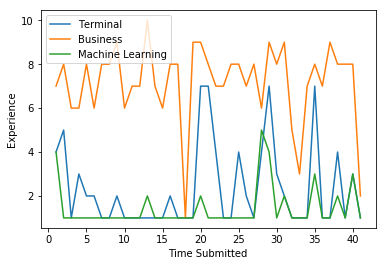

In [25]:
plt.plot(survey['timestamp'], survey['terminal'], label="Terminal")
plt.plot(survey['timestamp'], survey['business'], label="Business")

plt.plot(survey['timestamp'], survey['machinelearning'], label="Machine Learning")
plt.ylabel("Experience")

plt.xlabel("Time Submitted")
plt.legend()
plt.show()

## 3. Getting data from the internet

This section looks at obtaining data are loading it into Python.

### 3.1. Excercise: Downloading the Iris dataset

One of the most famous datasets in Machine Learning is the Iris dataset. We looked at it in lectures, it is referred to in the text book, it is used in many publications. 

First lets download it from the UCI Machine Learning repository: http://mlearn.ics.uci.edu/MLRepository.html

We make use of urllib. It is a python library that is part of the base package - it is for downloading urls. 

Read the doc! 
https://docs.python.org/3/library/urllib.html#module-urllib

In [4]:
import urllib.request
import pandas as pd
import numpy as np

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
response = urllib.request.urlopen(url)
data = response.read()      # a raw bits 'bytes' object
text = data.decode('utf-8') # use the utf-8 string format to create a string 'str' object 
iris_df=pd.read_csv(url, names=("sepal length","sepal width","petal length","petal width","class")) # Panda object

#### Take a look at the file contents

In [2]:
text

'5.1,3.5,1.4,0.2,Iris-setosa\n4.9,3.0,1.4,0.2,Iris-setosa\n4.7,3.2,1.3,0.2,Iris-setosa\n4.6,3.1,1.5,0.2,Iris-setosa\n5.0,3.6,1.4,0.2,Iris-setosa\n5.4,3.9,1.7,0.4,Iris-setosa\n4.6,3.4,1.4,0.3,Iris-setosa\n5.0,3.4,1.5,0.2,Iris-setosa\n4.4,2.9,1.4,0.2,Iris-setosa\n4.9,3.1,1.5,0.1,Iris-setosa\n5.4,3.7,1.5,0.2,Iris-setosa\n4.8,3.4,1.6,0.2,Iris-setosa\n4.8,3.0,1.4,0.1,Iris-setosa\n4.3,3.0,1.1,0.1,Iris-setosa\n5.8,4.0,1.2,0.2,Iris-setosa\n5.7,4.4,1.5,0.4,Iris-setosa\n5.4,3.9,1.3,0.4,Iris-setosa\n5.1,3.5,1.4,0.3,Iris-setosa\n5.7,3.8,1.7,0.3,Iris-setosa\n5.1,3.8,1.5,0.3,Iris-setosa\n5.4,3.4,1.7,0.2,Iris-setosa\n5.1,3.7,1.5,0.4,Iris-setosa\n4.6,3.6,1.0,0.2,Iris-setosa\n5.1,3.3,1.7,0.5,Iris-setosa\n4.8,3.4,1.9,0.2,Iris-setosa\n5.0,3.0,1.6,0.2,Iris-setosa\n5.0,3.4,1.6,0.4,Iris-setosa\n5.2,3.5,1.5,0.2,Iris-setosa\n5.2,3.4,1.4,0.2,Iris-setosa\n4.7,3.2,1.6,0.2,Iris-setosa\n4.8,3.1,1.6,0.2,Iris-setosa\n5.4,3.4,1.5,0.4,Iris-setosa\n5.2,4.1,1.5,0.1,Iris-setosa\n5.5,4.2,1.4,0.2,Iris-setosa\n4.9,3.1,1.5,0

### 3.2. Decision Tree Learning with sklearn

In [5]:
iris_df[:].head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Please refer to the Panda documentation during this practical.

read csv method doc: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html#pandas.read_csv

Some information on merging and combining data frames is at the following link: https://pandas.pydata.org/pandas-docs/stable/merging.html

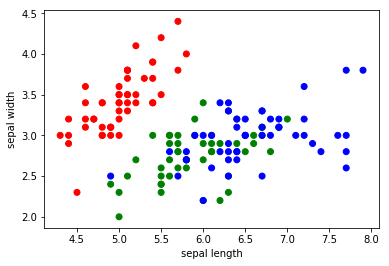

In [64]:
import matplotlib.pyplot as plt
x = iris_df["sepal length"]
y = iris_df["sepal width"]
iris_df["class"]
colors = {'Iris-setosa':'red', 'Iris-virginica':'blue', 'Iris-versicolor':'green'}

plt.scatter(x, y, c = iris_df["class"].apply(lambda x: colors[x]))

#labels
plt.xlabel('sepal length')
plt.ylabel('sepal width')


plt.show()

Produce a 3-D plot using matplotlib. 

You should refer to the matplotlib documentation for 3d plotting - see https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html

![Iris](images/iris.png)


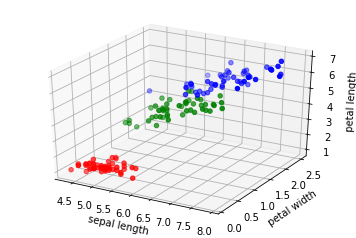

In [36]:
## put your plotting code here
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np


x = iris_df['sepal length']
y = iris_df['petal width']
z = iris_df['petal length']
iris_df['class']
colors = {'Iris-setosa':'red', 'Iris-virginica':'blue', 'Iris-versicolor':'green'}

fig = plt.figure()
figure = fig.add_subplot(111,projection='3d')

figure.scatter(x,y,z,c=iris_df['class'].apply(lambda x: colors[x]))

figure.set_xlabel('sepal length')
figure.set_ylabel('petal width')
figure.set_zlabel('petal length')

plt.show()


The plot shows the values of two attributes of Iris and indicates the flower class by color.

Now we learn a decision tree to classify the iris dataset.

Please read the documentation for Decision Trees in sklearn http://scikit-learn.org/stable/modules/tree.html#tree-classification

In [32]:
from sklearn import tree

attributes = iris_df[["sepal length","sepal width","petal length","petal width"]]
target = iris_df[["class"]]

clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(attributes,target)
#target
#attributes

We can use the decision tree for prediction.

First lets predict the values of a feature vector containing [1,1,1,1]:

In [9]:
clf.predict([[1,1,1,1]])

array(['Iris-setosa'], dtype=object)

Okay was predicted to be versicolor.

Now try predicting the values of the whole dataset that was used for learning the decision tree and compare with original training data:

In [22]:
prediction = clf.predict(attributes)
prediction_df = pd.DataFrame({"prediction": prediction})

prediction_df.head()

# create a result that contains the training data classes and the prediction result
# use the pandas function concat to join the data frames - note the axis parameter means to join columns
training_result = pd.concat([prediction_df, target], axis=1)
training_result.head()


,prediction,class
0,Iris-setosa,Iris-setosa
1,Iris-setosa,Iris-setosa
2,Iris-setosa,Iris-setosa
3,Iris-setosa,Iris-setosa
4,Iris-setosa,Iris-setosa


How can we work out the percentage of correctly classified examples - that is where prediction is equal to the target class in Python?

In [26]:
# write the code to calculate the misclassifications here...
# calculate the proportion of records where the predicted class is not equal to the actual class
wrong = sum(training_result['prediction'] != training_result['class'])   
total = len(target)
percentage = wrong/total * 100
print(percentage,'%')

0.0 %


#### Training data

You will have noticed there was a very high correspondance between the target and the classification by the decision tree which is not surprising given the decision tree was learned from this information.

What if we don't use all of the training data for learning the decision model?

In the following we use every second line in the original data file to learn the decision tree that is based on only half the data (the example uses every second row to learn the decision tree):

In [34]:
attributes_training = attributes[attributes.index % 2 != 0]  # Use very 2rd row, exclude every second element starting from 0 
                                                            #(note: % is the modulo operator)
target_training = target[target.index % 2 != 0] # every second row

# learn the decision tree
clf2 = tree.DecisionTreeClassifier(criterion='entropy')
clf2 = clf.fit(attributes_training,target_training)

Now lets use this model for prediction

In [35]:
attributes_test = attributes[attributes.index % 2 != 1]  # Use very 2rd row, exclude every second element starting from 0 
                                                            #(note: % is the modulo operator)

prediction = clf.predict(attributes_test)
prediction_df_1 = pd.DataFrame({"prediction": prediction})
prediction_df_1.head()

,prediction
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


To evaluate how good the decision tree is at making predictions on "new", unseen data (that is unseen during the process of constructing the model) compare the actual value of the target (ie the one in the file) with decision tree predictions.

In [41]:
actual_class_test = target[target.index % 2 != 1] 
actual_class_test.index=range(75)

training_result = pd.concat([prediction_df_1, actual_class_test], axis=1)

training_result.head()

,prediction,class
0,Iris-setosa,Iris-setosa
1,Iris-setosa,Iris-setosa
2,Iris-setosa,Iris-setosa
3,Iris-setosa,Iris-setosa
4,Iris-setosa,Iris-setosa


Looking at the above you can quickly observe the results of the prediction differ from the original dataset. 

Use your method to calculate the misclassification percentage to evaluate the decision tree classifier

In [40]:
wrong = sum(training_result['prediction'] != training_result['class'])   
total = len(target)
percentage = wrong/total * 100
print(percentage,'%')

3.3333333333333335 %


## 4. Exercise

Now download another dataset from the UCI Machine Learning Repository and perform a similar analysis.

Make sure to choose one the classification problems: https://archive.ics.uci.edu/ml/datasets.html?format=&task=cla&att=&area=&numAtt=&numIns=100to1000&type=&sort=nameUp&view=table

It would be a good idea to have a look also at the dataset in your browser to find one using csv format :-)

1. First perform some initial examinations of the data using head etc
1. Then generate summary statistics
1. Next generate some plots to visualise the data
1. Then learn a decision tree classifier 

1. Initial examinations: 
   class name  left weight  left distance  right weight  right distance
0          B            1              1             1               1
1          R            1              1             1               2
2          R            1              1             1               3
3          R            1              1             1               4
4          R            1              1             1               5 

2. Summary statistics: 
        left weight  left distance  right weight  right distance
count   625.000000     625.000000    625.000000      625.000000
mean      3.000000       3.000000      3.000000        3.000000
std       1.415346       1.415346      1.415346        1.415346
min       1.000000       1.000000      1.000000        1.000000
25%       2.000000       2.000000      2.000000        2.000000
50%       3.000000       3.000000      3.000000        3.000000
75%       4.000000       4.000000      4.000000        4.000000
max     

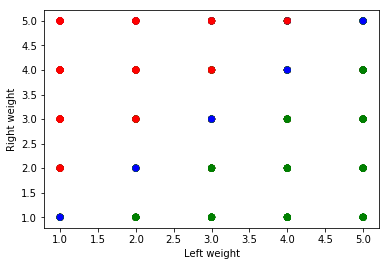

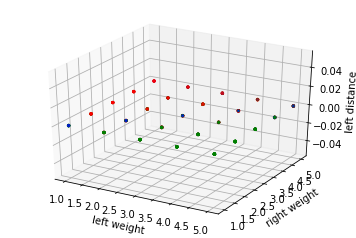

4. A decision tree classifier:
['B']
  prediction class name
0          B          B
1          R          R
2          R          R
3          R          R
4          R          R 

Incorrect prediction:  0.0 % 

Incorrect prediction:  56.00000000000001 %


In [77]:
# You can put your code here and try to make it easy for another person to read.
# For the final version you probably don't need more than one cells for each of the 
# points 1-4 above. Make sure to delete  empty cells when you are finished using the little 
# sissors icon at the top
import urllib.request
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import tree

# Data Title: Balance Scale Weight & Distance Database
#  Attribute Information:
#     1. Class Name: 3 (L, B, R)
#     2. Left-Weight: 5 (1, 2, 3, 4, 5)
#     3. Left-Distance: 5 (1, 2, 3, 4, 5)
#     4. Right-Weight: 5 (1, 2, 3, 4, 5)
#     5. Right-Distance: 5 (1, 2, 3, 4, 5)
balance = 'https://archive.ics.uci.edu/ml/machine-learning-databases/balance-scale/balance-scale.data'

response = urllib.request.urlopen(balance)
data = response.read()      # a raw bits 'bytes' object
text = data.decode('utf-8') # use the utf-8 string format to create a string 'str' object 
bala_df=pd.read_csv(balance, names=("class name","left weight","left distance","right weight","right distance")) # Panda object
#text
print('1. Initial examinations:','\n',bala_df[:].head(),'\n')
print('2. Summary statistics:','\n',bala_df.describe(),'\n')


print('3. Visualized data:')
x = bala_df['left weight']
y = bala_df['right weight']
colors = {'L':'green','B':'blue','R':'red'}
plt.scatter(x,y,c = bala_df['class name'].apply(lambda x: colors[x]))
plt.xlabel('Left weight')
plt.ylabel('Right weight')

xs = bala_df['left weight']
ys = bala_df['right weight']
zs = bala_df['left distance']
fig = plt.figure()
figure = fig.add_subplot(111,projection='3d')
figure.set_xlabel('left weight')
figure.set_ylabel('right weight')
figure.set_zlabel('left distance')
plt.scatter(x,y,z,c = bala_df['class name'].apply(lambda x: colors[x]))
plt.show()


print('4. A decision tree classifier:')
attributes = bala_df[['left weight','left distance','right weight','right distance']]
target = bala_df[['class name']]
t = tree.DecisionTreeClassifier(criterion = 'entropy')
t = t.fit(attributes,target)
print(t.predict([[1,1,1,1]]))

prediction = t.predict(attributes)
prediction_df = pd.DataFrame({'prediction':prediction})
#print(prediction_df.head())
training_result = pd.concat([prediction_df, target], axis=1)
print(training_result.head(),'\n')

wrong = sum(training_result['prediction'] != training_result['class name'])   
total = len(target)
percentage = wrong/total * 100
print('Incorrect prediction: ',percentage,'%','\n')

actual_class_test = target[target.index % 2 != 1] 
training_result = pd.concat([prediction_df_1, actual_class_test], axis=1)
wrong = sum(training_result['prediction'] != training_result['class name'])   
total = len(target)
percentage = wrong/total * 100
print('Incorrect prediction: ',percentage,'%')

## 5. Going forward
Spend some time to go over the work in this and the previous tutorial to become confortable with the material. Also don't worry too much if you are not quite comfortable with parts 3 and 4. Programming in Python, and programming generally, requires frequent consulting of docs and searching online especially when you are starting out with a new tool.